# 1. Import Libraries

In [46]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import math, os, shutil
warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 500
pd.set_option('display.max_columns', 1000)
%matplotlib inline

# Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp).

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

## Process

- MedCamp employees / volunteers reach out to people and drive registrations.
- During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of healthcamp.

## Note 

- Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
- For a few camps, there was hardware failure, so some information about date and time of registration is lost.
- MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

## Favorable outcome:
- For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
- You need to predict the chances (probability) of having a favourable outcome.

# Import Data

In [2]:
train_data = pd.read_csv('../Data/Train/Train.csv')
firstcamp_data = pd.read_csv('../Data/Train/First_Health_Camp_Attended.csv')
secondcamp_data = pd.read_csv('../Data/Train/Second_Health_Camp_Attended.csv')
thirdcamp_data = pd.read_csv('../Data/Train/Third_Health_Camp_Attended.csv')
healthcamp_data = pd.read_csv('../Data/Train/Health_Camp_Detail.csv')
patient_data = pd.read_csv('../Data/Train/Patient_Profile.csv')

test_data = pd.read_csv('../Data/test_l0Auv8Q.csv')
submission_data = pd.read_csv('../Data/sample_submmission.csv')

# Data Description

## Train Data
train.zip contains 6 different csv files apart from the data dictionary as described below:

**Health_Camp_Detail.csv** – File containing Health_Camp_Id, Camp_Start_Date, Camp_End_Date and Category details of each camp.

**Train.csv** – File containing registration details for all the test camps. This includes Patient_ID, Health_Camp_ID, Registration_Date and a few anonymized variables as on registration date.

**Patient_Profile.csv** – This file contains Patient profile details like Patient_ID, Online_Follower, Social media details, Income, Education, Age, First_Interaction_Date, City_Type and Employer_Category

**First_Health_Camp_Attended.csv** – This file contains details about people who attended health camp of first format. This includes Donation (amount) & Health_Score of the person.

**Second_Health_Camp_Attended.csv** - This file contains details about people who attended health camp of second format. This includes Health_Score of the person.

**Third_Health_Camp_Attended.csv** - This file contains details about people who attended health camp of third format. This includes Number_of_stall_visited & Last_Stall_Visited_Number.

## Test Data

**Test.csv** – File containing registration details for all the camps done after 1st April 2006. This includes Patient_ID, Health_Camp_ID, Registration_Date and a few anonymized variables as on registration date. Participant should make predictions for these patient camp combinations

## Submission File

**sample_submission.csv**

**Patient_ID**: Unique Identifier for each patient. This ID is not sequential in nature and can not be used in modeling

**Health_Camp_ID**: Unique Identifier for each camp. This ID is not sequential in nature and can not be used in modeling

**Outcome**: Predicted probability for having a favourable outcome depending on the format

# 2. Data First Look

In [3]:
print(f'Train data has {train_data.shape[0]} rows & {train_data.shape[1]} columns')
print(f'First camp data has {firstcamp_data.shape[0]} rows & {firstcamp_data.shape[1]} columns')
print(f'Second camp data has {secondcamp_data.shape[0]} rows & {secondcamp_data.shape[1]} columns')
print(f'Third camp data has {thirdcamp_data.shape[0]} rows & {thirdcamp_data.shape[1]} columns')
print(f'Health camp data has {healthcamp_data.shape[0]} rows & {healthcamp_data.shape[1]} columns')
print(f'Patient profile data has {patient_data.shape[0]} rows & {patient_data.shape[1]} columns')
print(f'Test data has {test_data.shape[0]} rows & {test_data.shape[1]} columns')
print(f'Submission data has {submission_data.shape[0]} rows & {submission_data.shape[1]} columns')

Train data has 75278 rows & 8 columns
First camp data has 6218 rows & 5 columns
Second camp data has 7819 rows & 3 columns
Third camp data has 6515 rows & 4 columns
Health camp data has 65 rows & 6 columns
Patient profile data has 37633 rows & 11 columns
Test data has 35249 rows & 8 columns
Submission data has 35249 rows & 3 columns


In [4]:
train_data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [5]:
firstcamp_data.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [6]:
secondcamp_data.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [7]:
thirdcamp_data.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [8]:
healthcamp_data.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [9]:
patient_data.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [10]:
test_data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [11]:
submission_data.head()

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.5
1,500633,6584,0.5
2,506945,6582,0.5
3,497447,6551,0.5
4,496446,6533,0.5


# 3. Creating final data sets

## 3.1 Training Data

In [13]:
train_final_data = pd.merge(train_data, firstcamp_data.drop('Unnamed: 4', axis=1), how='left', on=['Patient_ID', 'Health_Camp_ID'], indicator='camp1_merge_ind')
train_final_data = pd.merge(train_final_data, secondcamp_data, how='left', on=['Patient_ID', 'Health_Camp_ID'], indicator='camp2_merge_ind')
train_final_data = pd.merge(train_final_data, thirdcamp_data, how='left', on=['Patient_ID', 'Health_Camp_ID'], indicator='camp3_merge_ind')
train_final_data = pd.merge(train_final_data, healthcamp_data, how='left', on='Health_Camp_ID', indicator='healthcamp_merge_ind')
train_final_data = pd.merge(train_final_data, patient_data, how='left', on='Patient_ID', indicator='patient_merge_ind')

## 3.2 Dependent Variable Creation for train data

In [14]:
train_final_data['Outcome'] = 0
train_final_data.loc[(train_final_data['camp1_merge_ind']=='both') | 
                     (train_final_data['camp2_merge_ind']=='both') |
                     ((train_final_data['camp3_merge_ind']=='both') & (train_final_data['Number_of_stall_visited']>0))
                     ,'Outcome'] = 1

## 3.3 Test Data

In [18]:
test_final_data = pd.merge(test_data, firstcamp_data.drop('Unnamed: 4', axis=1), how='left', on=['Patient_ID', 'Health_Camp_ID'], indicator='camp1_merge_ind')
test_final_data = pd.merge(test_final_data, secondcamp_data, how='left', on=['Patient_ID', 'Health_Camp_ID'], indicator='camp2_merge_ind')
test_final_data = pd.merge(test_final_data, thirdcamp_data, how='left', on=['Patient_ID', 'Health_Camp_ID'], indicator='camp3_merge_ind')
test_final_data = pd.merge(test_final_data, healthcamp_data, how='left', on='Health_Camp_ID', indicator='healthcamp_merge_ind')
test_final_data = pd.merge(test_final_data, patient_data, how='left', on='Patient_ID', indicator='patient_merge_ind')

# 4. Data Cleaning

## 4.1 Date columns

In [68]:
date_cols = ['Registration_Date', 'Camp_Start_Date', 'Camp_End_Date', 'First_Interaction']

In [69]:
def to_date(df):
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%d-%b-%y')
    return df

In [70]:
train_final_data = to_date(train_final_data)
test_final_data = to_date(test_final_data)

## 4.2 Convert string columns to numeric

In [72]:
num_cols = ['Income', 'Education_Score', 'Age']

In [75]:
def to_numeric(df, columns):
    for col in df.columns:
        if (col in num_cols) & ~(ptypes.is_numeric_dtype(df[col])):
            df[col] = df[col].replace({'None':''})
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [76]:
train_final_data = to_numeric(train_final_data, num_cols)
test_final_data = to_numeric(test_final_data, num_cols)

# 5. Constants

In [48]:
ID1 = 'Patient_ID'
ID2 = 'Health_Camp_ID'
target = 'Outcome'

plot_dir = "../plots"

os.makedirs(plot_dir, exist_ok=True)
os.makedirs(f"{plot_dir}/univariate", exist_ok=True)
os.makedirs(f"{plot_dir}/bivariate", exist_ok=True)
os.makedirs(f"{plot_dir}/pair_plot", exist_ok=True)

In [101]:
ignore = ['Registration_Date', 'Donation', 'Health_Score', 'camp1_merge_ind', 'Health Score', 'camp2_merge_ind', 
          'Number_of_stall_visited', 'Last_Stall_Visited_Number', 'camp3_merge_ind', 'Camp_Start_Date', 
          'Camp_End_Date', 'healthcamp_merge_ind', 'First_Interaction', 'patient_merge_ind']

# 6. Data Visualization

## 6.1 Univariate Analysis

### 6.1.1 Discrete variables

In [111]:
discrete_vars = ['Category1', 'Category2', 'Category3', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 
                 'Facebook_Shared', 'City_Type', 'Employer_Category', 'Income']

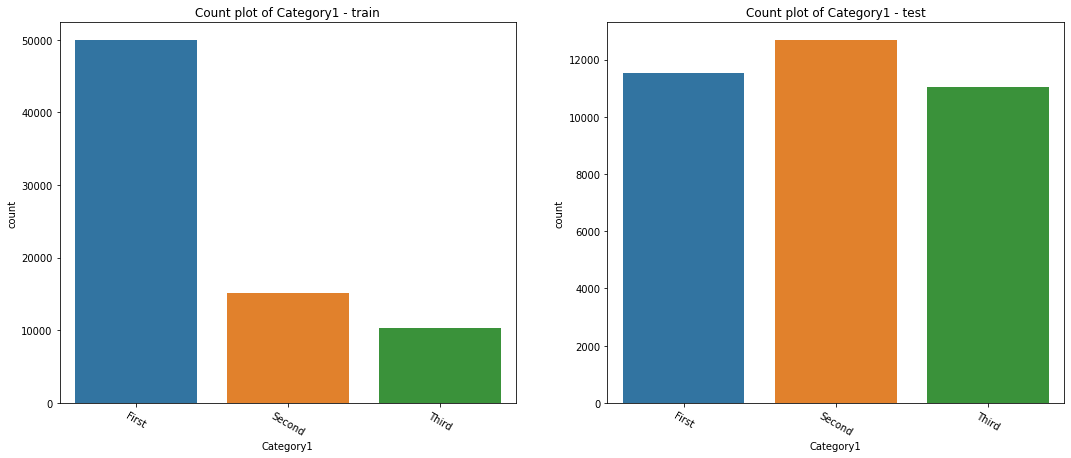

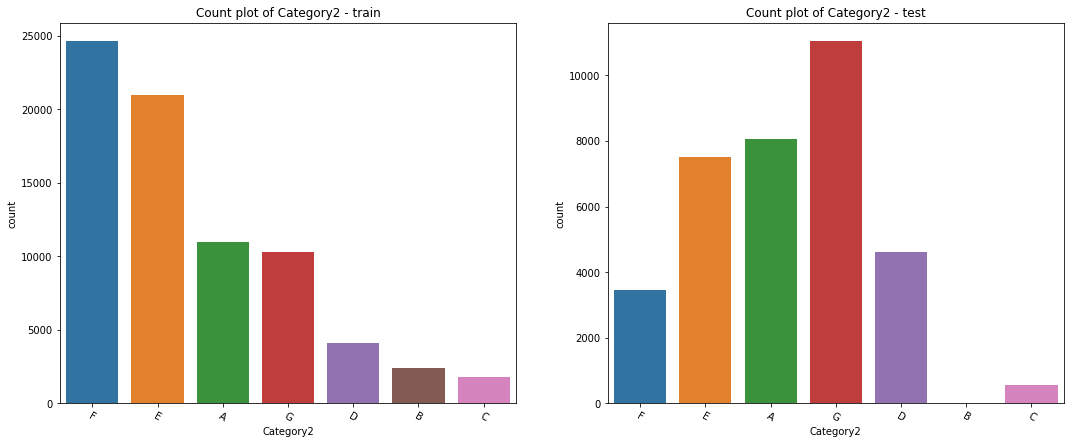

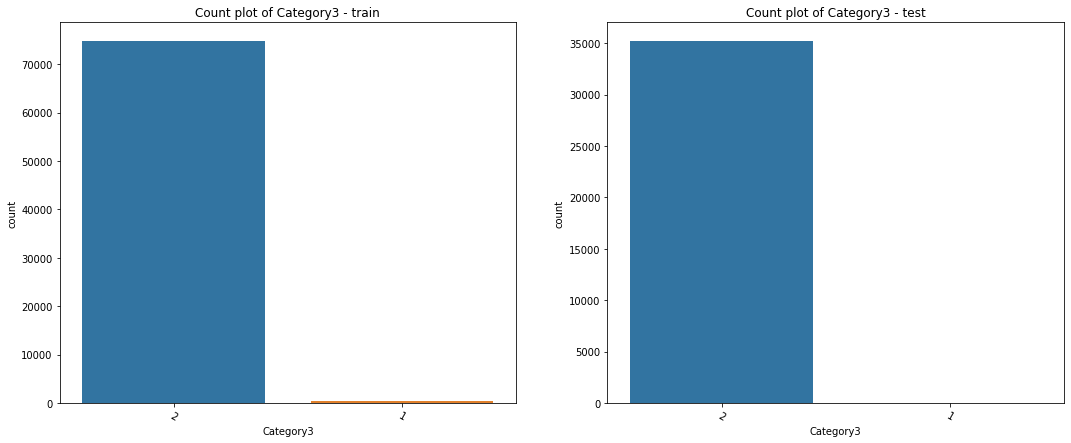

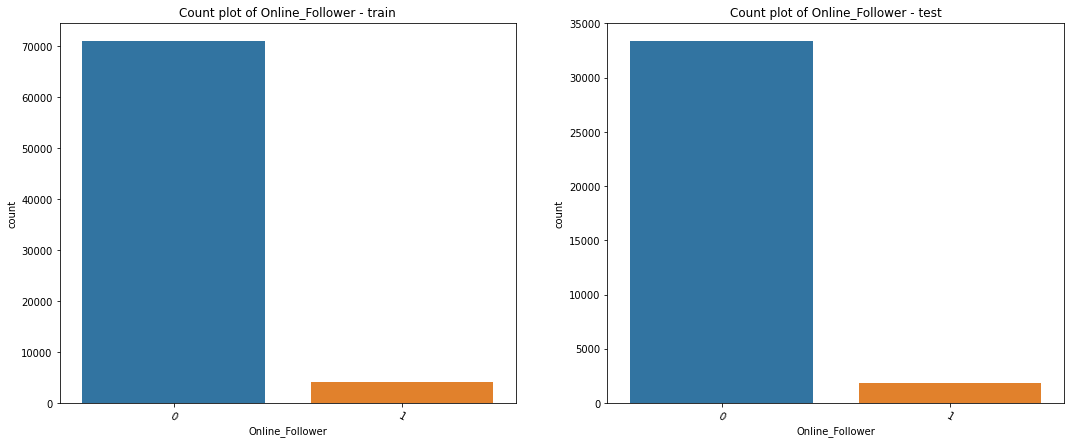

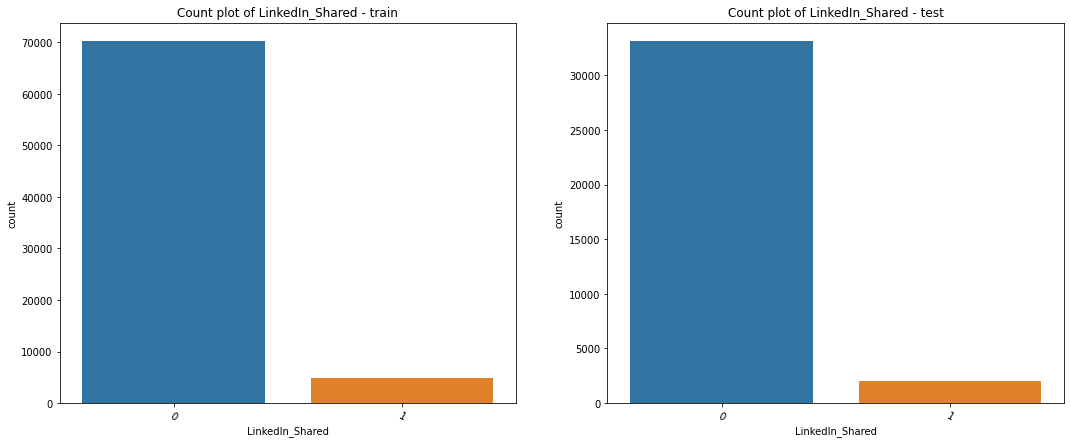

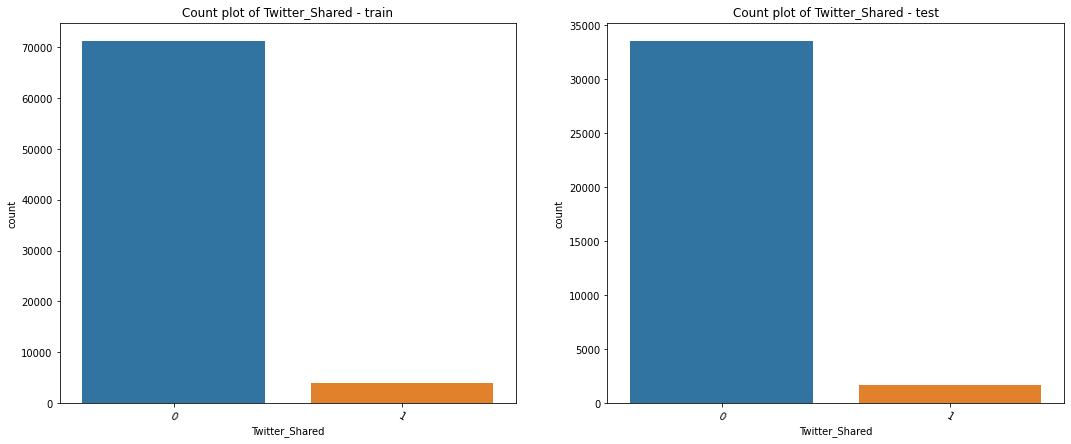

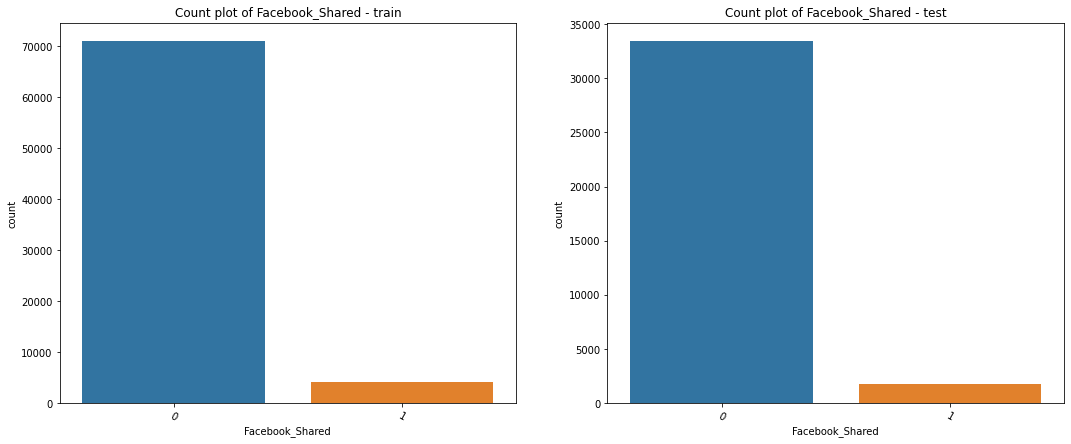

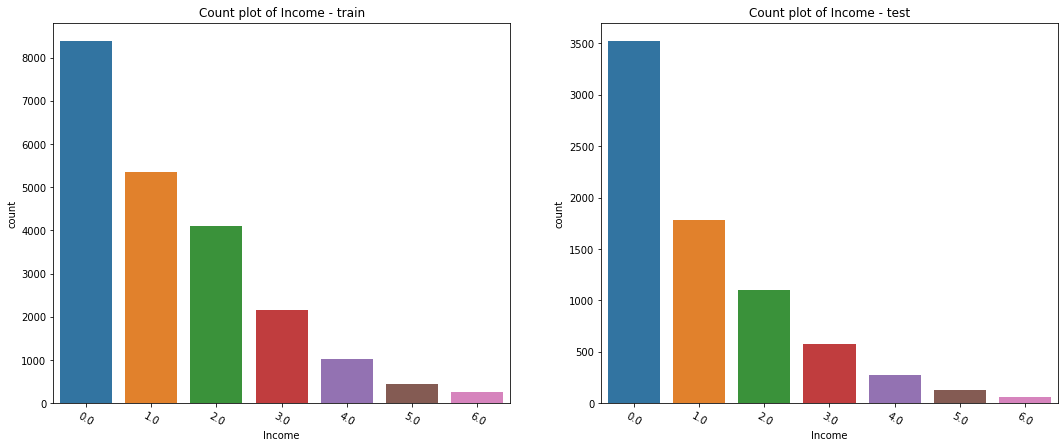

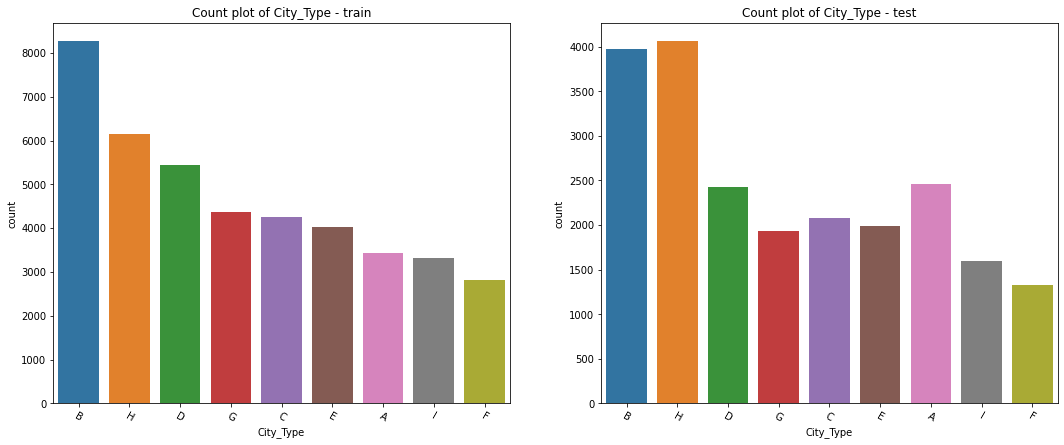

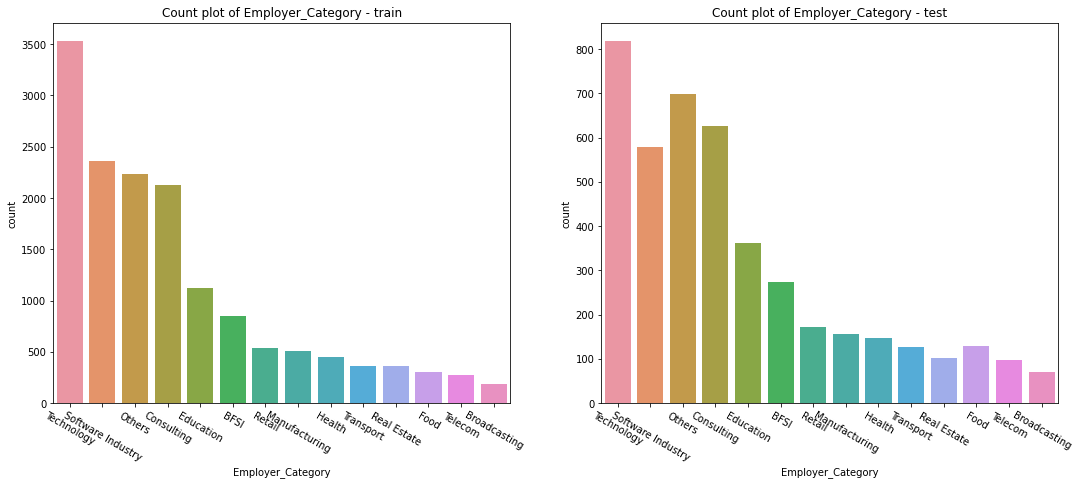

In [112]:
for col in train_final_data.columns:
    if col in discrete_vars:
        plt.figure(figsize=(18,7))
        ax1 = plt.subplot(121)
        g1 = sns.countplot(train_final_data[col], ax=ax1, order=train_final_data[col].value_counts().index)
        g1.set_xticklabels(g1.get_xticklabels(), rotation=330)
        ax2 = plt.subplot(122)
        g2 = sns.countplot(test_final_data[col], ax=ax2, order=train_final_data[col].value_counts().index)
        g2.set_xticklabels(g2.get_xticklabels(), rotation=330)
        g1.set_title(f"Count plot of {col} - train")
        g2.set_title(f"Count plot of {col} - test")
        plt.savefig(f"../plots/univariate/with_{col}.png", dpi=300)

### 6.1.2 Continuous Variables

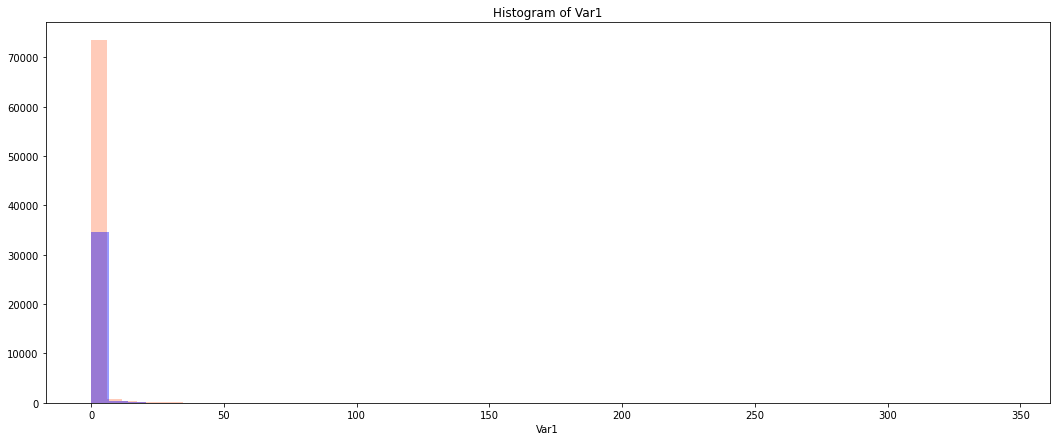

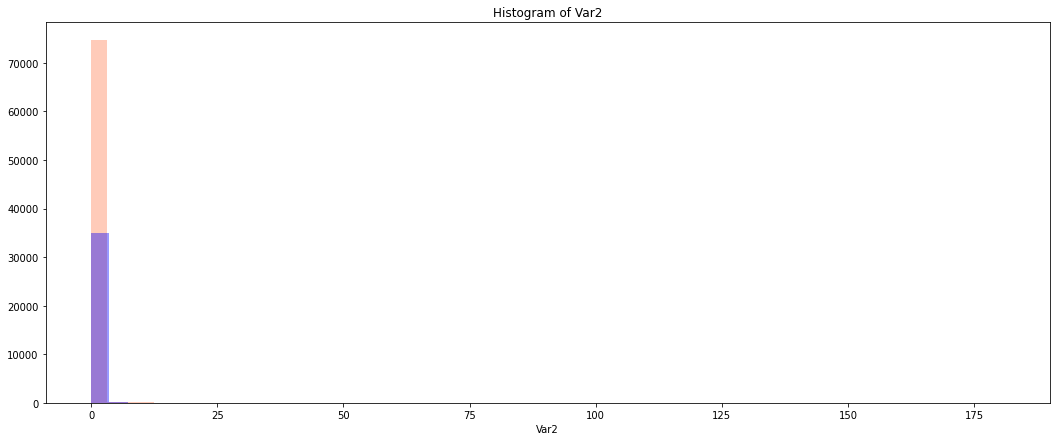

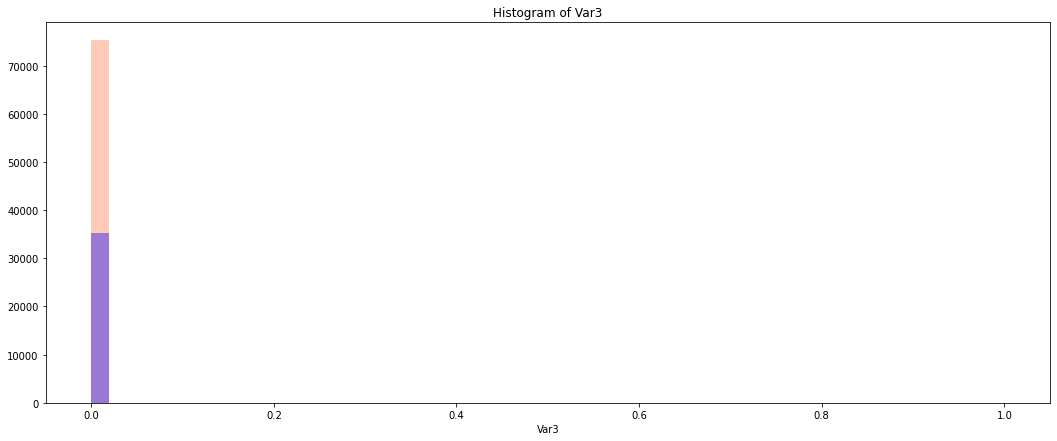

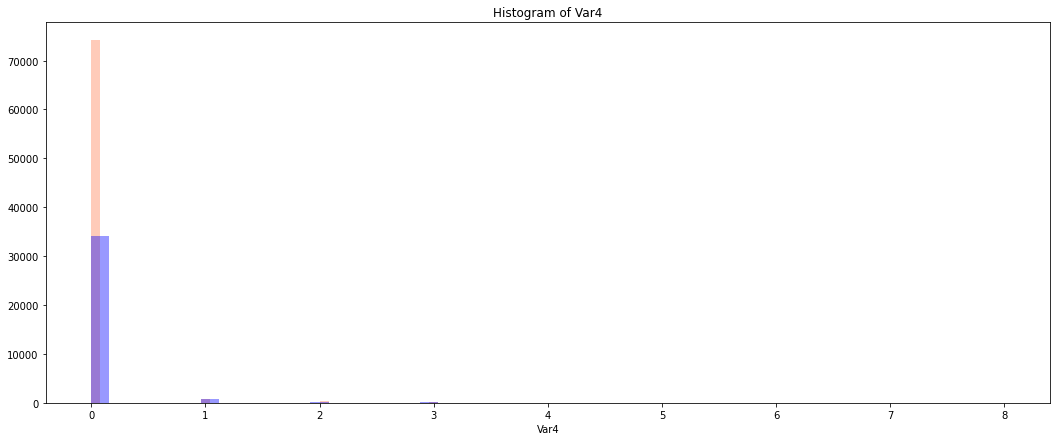

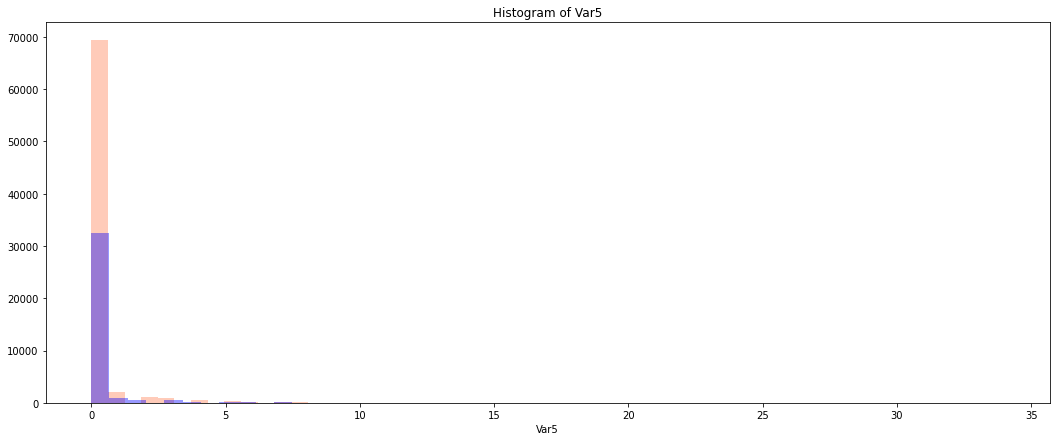

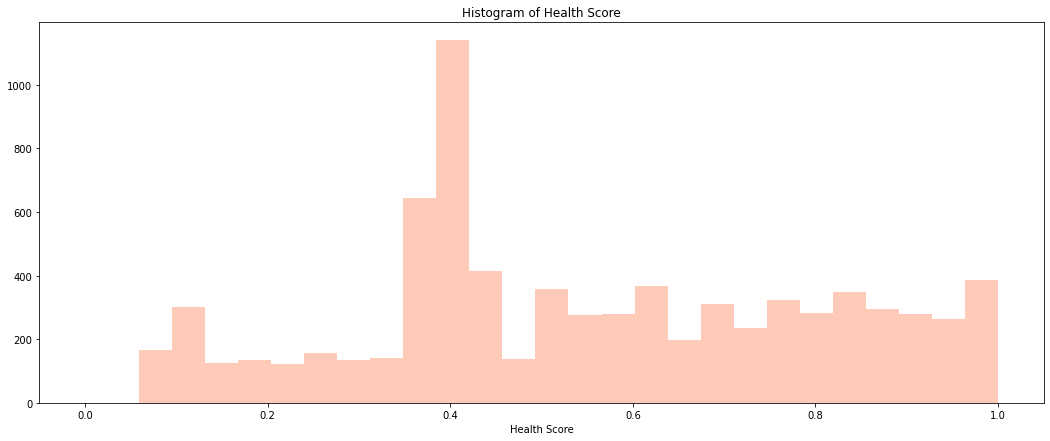

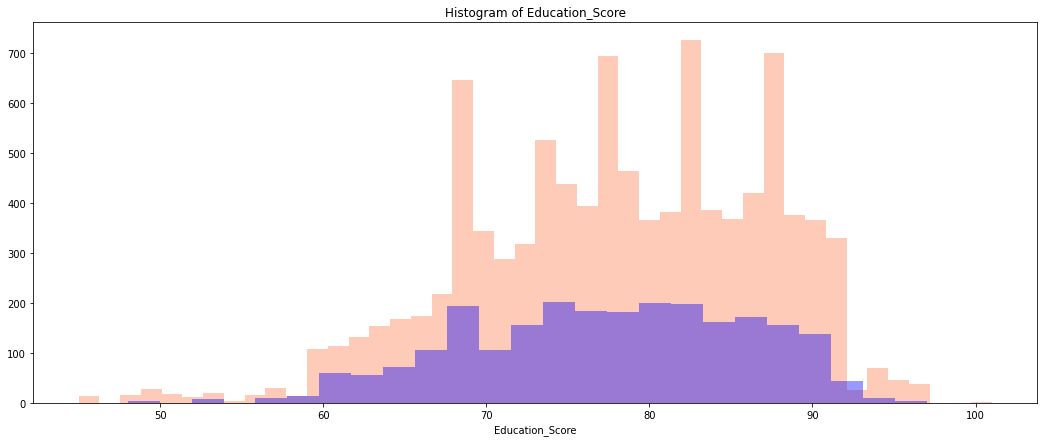

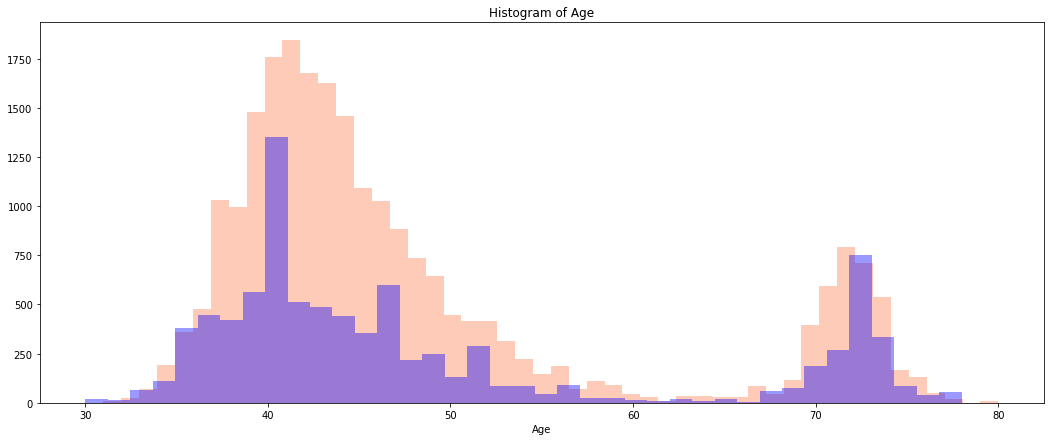

In [113]:
for col in train_final_data.columns:
    if (col not in ignore) and (col not in list((ID1, ID2, target))) and (col not in discrete_vars):
        plt.figure(figsize=(18,7))
        g1 = sns.distplot(train_final_data[col], color = 'coral', kde=False)
        g2 = sns.distplot(test_final_data[col], color = 'blue', kde=False)
        g2.set_title(f"Histogram of {col}")
        plt.savefig(f"../plots/univariate/with_{col}.png", dpi=300)